## 探索变量间的关系
比统计更直观

In [6]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes = True)
np.random.seed(sum(map(ord,'regression')))
import warnings

warnings.filterwarnings('ignore')
tips = sns.load_dataset('tips')

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips[tips['size'] == 1]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
82,10.07,1.83,Female,No,Thur,Lunch,1
111,7.25,1.00,Female,No,Sat,Dinner,1
222,8.58,1.92,Male,Yes,Fri,Lunch,1


### 绘制线性回归模型
最简单的方式：散点图 + 线性回归 + 95%置信区间

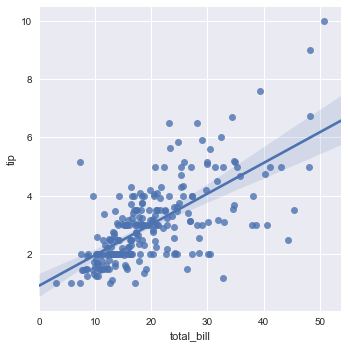

In [14]:
sns.lmplot(x='total_bill', y = 'tip', data=tips, ci=95)

对于变量连续取值，散点图就显得有些尴尬了

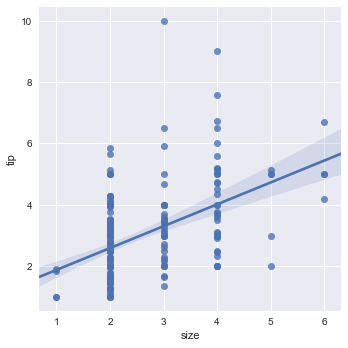

In [15]:
sns.lmplot(x='size', y='tip', data=tips)

#### 方法1：加个小抖动

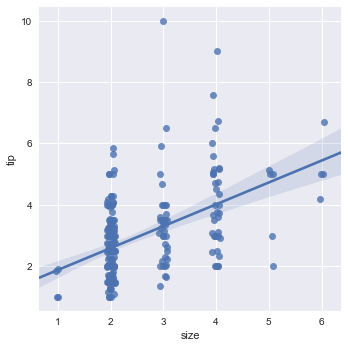

In [17]:
# x_jitter: 抖动程度
sns.lmplot(x='size', y='tip', data=tips, x_jitter= .08)

#### 方法2：离散取值上用均值和置信区间代替点

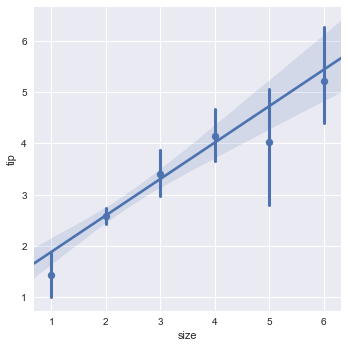

In [18]:
sns.lmplot(x='size', y = 'tip', data=tips, x_estimator=np.mean, ci=95)

## 拟合不同模型
有时候线性拟合效果不错，有些时候差强人意

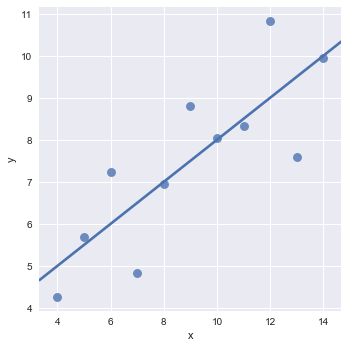

In [19]:
anscombe = sns.load_dataset('anscombe')
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'I'"), ci=None, scatter_kws={'s':80})

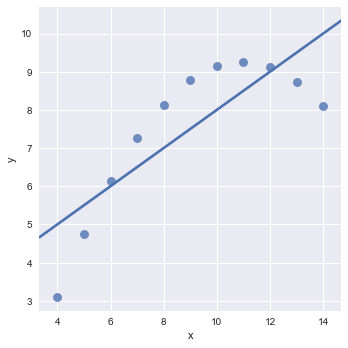

In [20]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'II'"), ci=None, scatter_kws={'s':80})

试试高阶拟合

这里是二阶（抛物线），size = 80

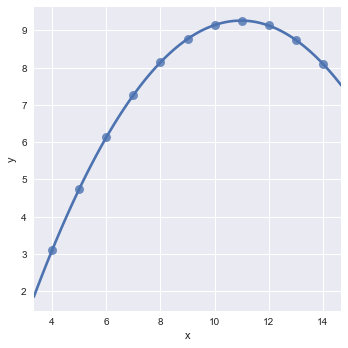

In [21]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'II'"), order=2, ci=95, scatter_kws={'s':80})

异常值肿么办？

robust：鲁棒性，健壮性。 将其中的异常点干掉

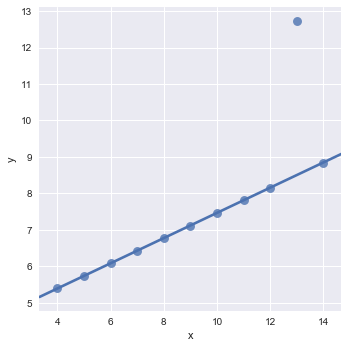

In [23]:
sns.lmplot(x='x', y='y', data=anscombe.query("dataset == 'III'"), robust=True,  ci=None, scatter_kws={"s": 80})

二值变量如何拟合？

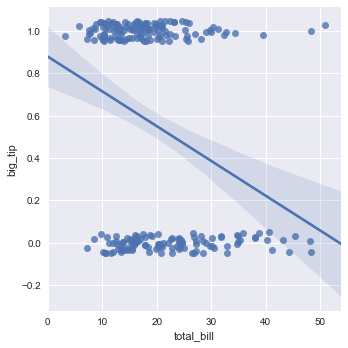

In [24]:
tips['big_tip'] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x='total_bill', y = 'big_tip', data=tips, y_jitter=.05)

逻辑回归拟合

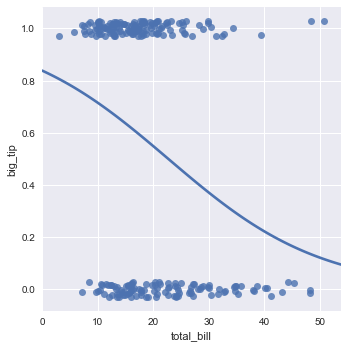

In [25]:
sns.lmplot(x='total_bill', y='big_tip', data=tips, logistic=True, y_jitter=.03,ci=None)

如何评价拟合曲线？残差(resid)曲线

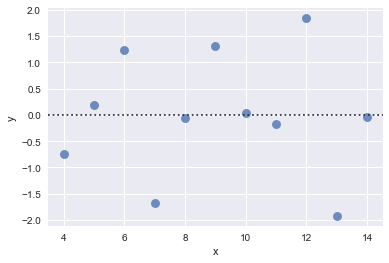

In [27]:
sns.residplot(x='x', y='y', data=anscombe.query("dataset == 'I'"), scatter_kws={'s':80})

拟合的好，就是白噪声的分布$N(0,\sigma^2)$

拟合的差，就能看出一些模式

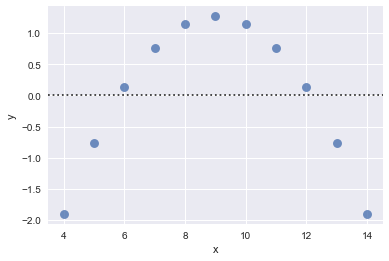

In [29]:
sns.residplot(x='x', y='y', data=anscombe.query("dataset == 'II'"), scatter_kws={'s':80})

### 变量间的条件关系摸索
hue:绘制两个维度之间的相关关系，按照 day 做分组，把分组后的数据做 lmplot，同时在一幅图上用不同的颜色呈现出来，不能将连续的值赋值给它，否则报错

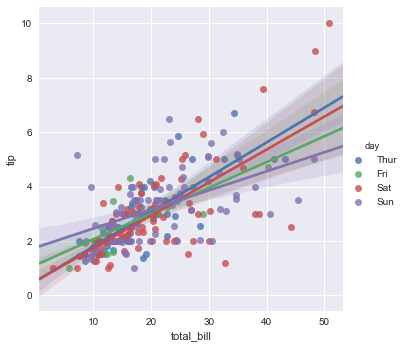

In [31]:
sns.lmplot(x='total_bill', y='tip', hue='day', data=tips)

尝试增加更多的分类条件

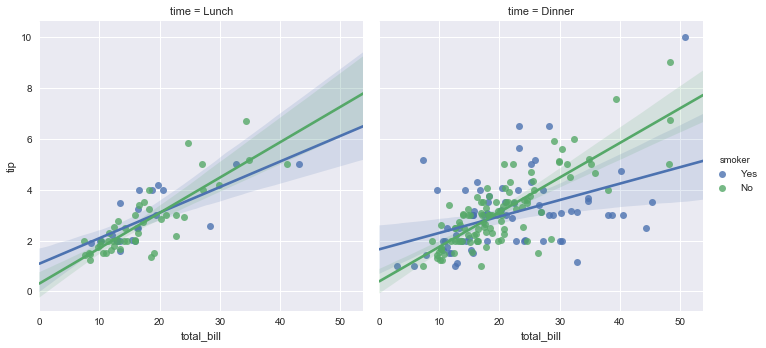

In [32]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', data=tips)

### 变量间的条件关系搜索

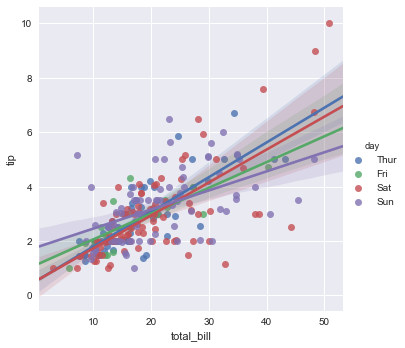

In [33]:
sns.lmplot(x='total_bill', y='tip', hue='day', data=tips)

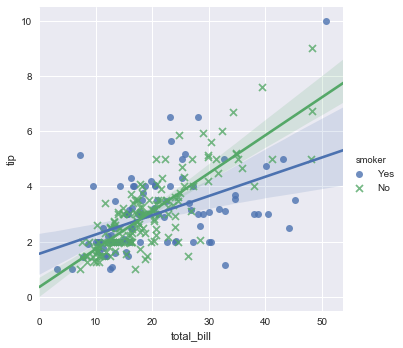

In [34]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips, markers=['o','x'])

尝试增加更多的分类条件

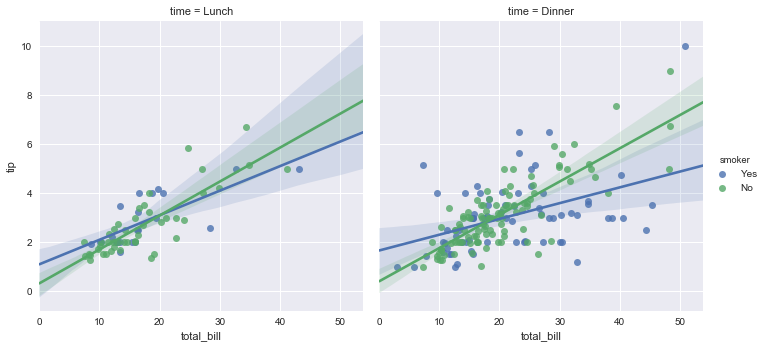

In [35]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', data=tips)

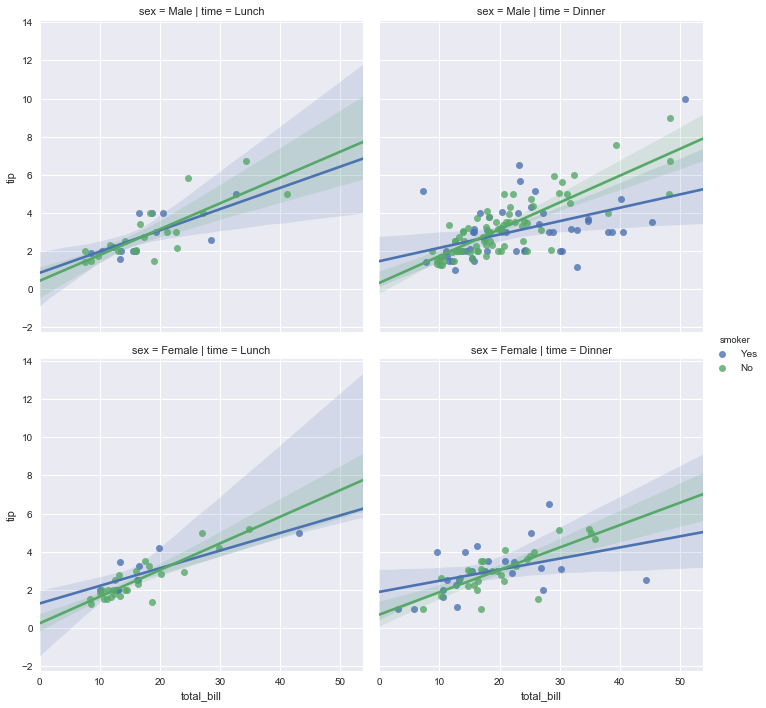

In [36]:
sns.lmplot(x='total_bill', y='tip', hue='smoker', col='time', row='sex', data=tips)

### 控制图片的大小和形状

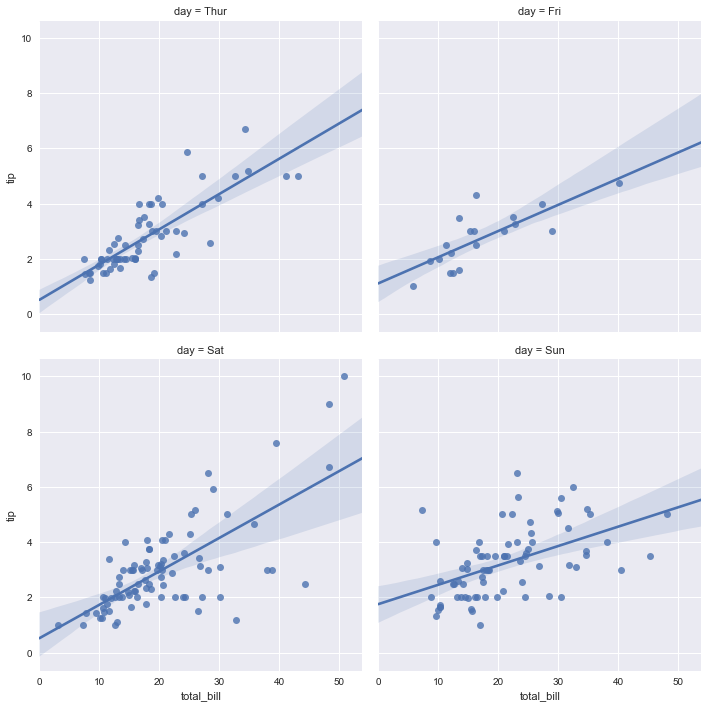

In [37]:
sns.lmplot(x='total_bill', y='tip', col='day', data=tips, col_wrap=2, size=5)

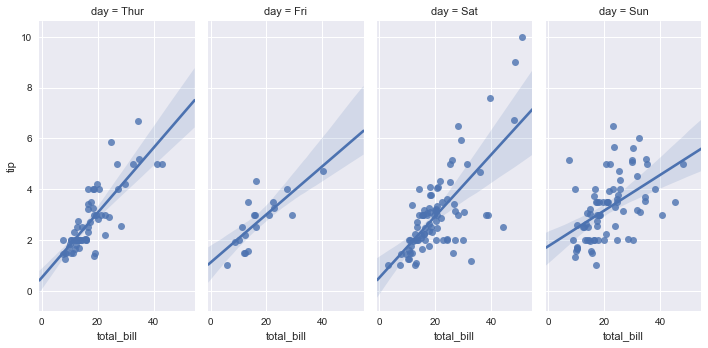

In [38]:
sns.lmplot(x='total_bill', y='tip', col='day', data=tips, aspect=0.5)